In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('D:/MLProjects/customer segmentation/Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()

In [5]:
scaling.fit(df[['Annual Income (k$)']])
df['Annual Income (k$)'] = scaling.transform(df[['Annual Income (k$)']])

In [6]:
scaling.fit(df[['Spending Score (1-100)']])
df['Spending Score (1-100)'] = scaling.transform(df[['Spending Score (1-100)']])

In [7]:
X = df.iloc[:,[3,4]].values

# K-means

In [8]:
from sklearn.cluster import KMeans
cluster = KMeans()

In [20]:
#within clusters sum of squares

wcss = []
for i in range(1,10):
    cluster = KMeans(n_clusters=i,init='k-means++', random_state=42)
    cluster.fit(X)
    wcss.append(cluster.inertia_)

intertia will give wcss values for each values of i.

# Elbow

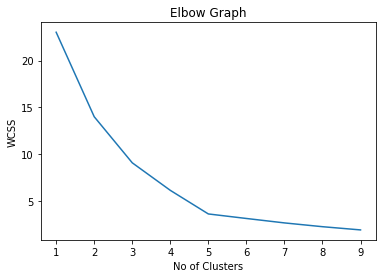

In [21]:
plt.plot(range(1,10),wcss)   #range is x and wcss is y axis
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Graph')
plt.show()

# Fitting With OPtimal CLusters

In [22]:
cluster = KMeans(n_clusters=5)

In [23]:
clusters = cluster.fit_predict(X)

In [27]:
clusters

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 4,
       0, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 1, 4, 1, 2, 1, 2, 1,
       4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

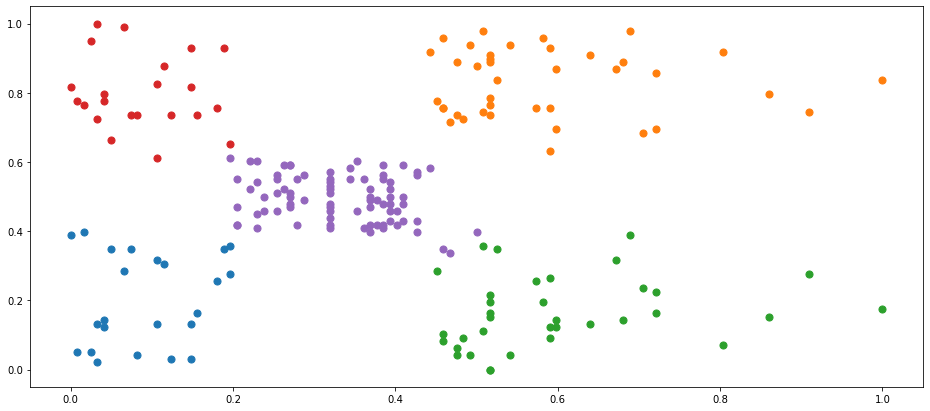

In [29]:
plt.figure(figsize=(16,7))
plt.scatter(X[clusters==0,0],X[clusters==0,1], s=50 , label='Cluster 1')
plt.scatter(X[clusters==1,0],X[clusters==1,1], s=50, label='Cluster 1')
plt.scatter(X[clusters==2,0],X[clusters==2,1], s=50,  label='Cluster 1')      #2,0 is x -cordinate, 2,1 is y
plt.scatter(X[clusters==3,0],X[clusters==3,1], s=50, label='Cluster 1')
plt.scatter(X[clusters==4,0],X[clusters==4,1], s=50,  label='Cluster 1')